In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from sklearn import metrics, tree, svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score,train_test_split,LeaveOneOut
from sklearn.naive_bayes import MultinomialNB
from statistics import mean

from data_load import *
from dictionaries import *
from score_models import *

# Choose the Model Whose Performance You Want to View

In [8]:
model_name = 'nb_le_f0_d0_b0_c0_v0'

# Model Performance

In [9]:
column_list = [
                'problem_type',
                'creative',
                'outdoors',
                'career',
                'group_work',
                'liked_courses',
                'disliked_courses',
                'programming',
                'join_clubs',
                'not_clubs',
                'liked_projects',
                'disliked_projects',
                'tv_shows',
                'alternate_degree',
                'expensive_equipment',
                'drawing',
                'essay',
                'architecture',
                'automotive',
                'business',
                'construction',
                'health',
                'environment',
                'manufacturing',
                'technology',
                'program'
                ]

ohe_main =  [
            'problem_type',
            'creative',
            'outdoors',
            'career',
            'group_work',
            'liked_courses',
            'disliked_courses',
            'programming',
            'join_clubs',
            'not_clubs',
            'liked_projects',
            'disliked_projects',
            'tv_shows',
            'alternate_degree',
            'expensive_equipment',
            'drawing',
            'essay'
        ]

In [10]:
model_data = pd.read_csv('exported_model_files/dataframes/'+model_name+'.csv',dtype=str)
ohe = ohe_main

if 'f0' in model_name:
    # Loading test data
    if 'le' in model_name:
        test_data_t7 = get_label_encoded_data('data/t7.csv',model_name='t7',column_list=column_list,drop_not_happy='H',data_balance=False)[0]
    elif 'ohe' in model_name:
        test_data_t7 = get_merged_encoded_data(directory = 'data/t7.csv',model_name ='t7',one_hot_encode=ohe,column_list = column_list,drop_not_happy='H',data_balance=False)

    test_data_t7_temp = test_data_t7.copy()[list(model_data.columns)].head(210)
    test_data = test_data_t7_temp
    test_data = test_data.reset_index()
    test_data = test_data.drop(['program','id'], axis=1)

    # Loading model files
    pkl_file = open('exported_model_files/metadata/'+model_name+'_cat', 'rb')
    index_dict = pickle.load(pkl_file)
    new_vector = np.zeros(len(index_dict))

    pkl_file = open('exported_model_files/models/'+model_name+'.pkl', 'rb')
    model = pickle.load(pkl_file)

    predictions ={}
    for i in range(0,len(test_data)):
        vector = np.asarray(test_data.loc[i,])
        predictions[i] = INV_INDEX_PROGRAM[model.predict([vector])[0]]
        
elif 'f1' in model_name:
    # Loading test data
    if 'le' in model_name:
        test_data_t7 = get_label_encoded_data('data/t7.csv',model_name='t7',column_list=column_list,drop_not_happy='H',data_balance=False)[0]
    elif 'ohe' in model_name:
        test_data_t7 = get_merged_encoded_data(directory = 'data/t7.csv',model_name ='t7',one_hot_encode=ohe,column_list = column_list,drop_not_happy='H',data_balance=False)

    test_data_t7_temp = test_data_t7.copy()[list(model_data.columns)].head(210)
    test_data = test_data_t7_temp
    test_data = test_data.reset_index()
    test_data = test_data.drop(['program','id'], axis=1)

    predictions ={}
    for i in range(0,len(test_data)):
        vector = np.asarray(test_data.loc[i,])
        predictions[i] = sort_probability_dict(binary_predict_proba(vector,model_name,test_data_t7))[2][0]

  
test_data = test_data_t7_temp
test_data['predicted_program'] = pd.Series(predictions)
test_data.program = test_data.program.map(INV_INDEX_PROGRAM)
test_data = test_data.reset_index()
test_data = test_data.drop(['id'], axis=1)

In [11]:
pred_to_orig = {
                'mech-orig': 0,
                'bmed-orig': 0,
                'swe-orig': 0,
                'tron-orig': 0,
                'cive-orig': 0,
                'chem-orig': 0,
                'syde-orig': 0,
                'msci-orig': 0,
                'ce-orig': 0,
                'elec-orig': 0,
                'nano-orig': 0,
                'geo-orig': 0,
                'env-orig': 0,
                'arch-e-orig': 0,
                'arch-orig': 0
                }

for i in range(0,len(test_data)):
    try:
        prediction_count = pred_to_orig[str(test_data.loc[i,'predicted_program'])+'-orig']
        try:
            prediction_count[test_data.loc[i,'program']] =prediction_count[test_data.loc[i,'program']] + 1
        except:
            prediction_count[test_data.loc[i,'program']] = 0

        pred_to_orig[str(test_data.loc[i,'predicted_program'])+'-orig'] = prediction_count
    except:
        pred_to_orig[str(test_data.loc[i,'predicted_program'])+'-orig'] = {
                                                        'mech': 0,
                                                        'bmed': 0,
                                                        'swe': 0,
                                                        'tron': 0,
                                                        'cive': 0,
                                                        'chem': 0,
                                                        'syde': 0,
                                                        'msci': 0,
                                                        'ce': 0,
                                                        'elec': 0,
                                                        'nano': 0,
                                                        'geo': 0,
                                                        'env': 0,
                                                        'arch-e': 0,
                                                        'arch': 0
                                                        }
        prediction_count = pred_to_orig[str(test_data.loc[i,'predicted_program'])+'-orig']
        try:
            prediction_count[test_data.loc[i,'program']] =prediction_count[test_data.loc[i,'program']] + 1
        except:
            prediction_count[test_data.loc[i,'program']] = 0

        pred_to_orig[str(test_data.loc[i,'predicted_program'])+'-orig'] = prediction_count

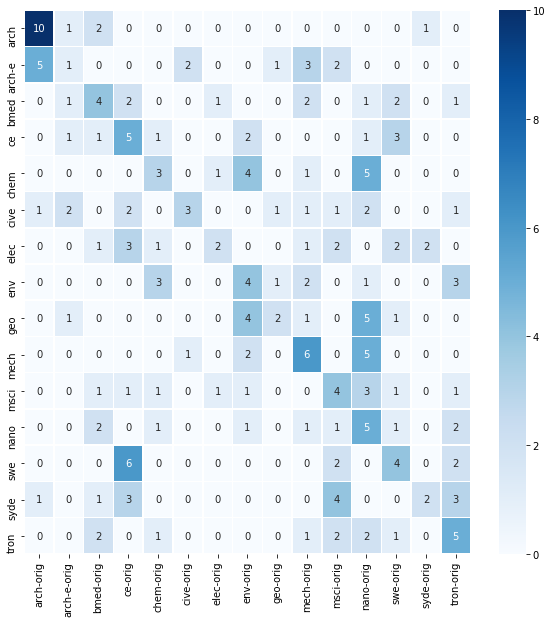

In [12]:
df = pd.DataFrame(pred_to_orig)
df = df.reindex(sorted(df.columns), axis=1)
df['id'] = df.index
df = df.sort_values(by=['id'], ascending = True)
df.set_index('id')
df = df.drop(['id'], axis=1)
df = df[['arch-orig','arch-e-orig','bmed-orig','ce-orig','chem-orig','cive-orig','elec-orig','env-orig','geo-orig','mech-orig','msci-orig','nano-orig','swe-orig','syde-orig' ,'tron-orig']]


# print(df)
plt.figure(figsize=(10,10))
sns.heatmap(df,cmap='Blues',annot=True,linewidth=0.5)

# Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, 
# Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, 
# PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, 
# PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, 
# RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, 
# Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, 
# afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, 
# cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, 
# gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, 
# gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, 
# gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, 
# jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r,
# plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, 
# summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, 
# twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

### Gender Bias Distribution

In [13]:
# check_bias = check_gender_bias(directory,model_name,column_list)
# df = pd.DataFrame(check_bias)
# print(df)
# df.plot.bar(figsize=(18,6))
# plt.show()